<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-06-29 14:53:28.169942: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 14:53:28.179256: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 14:53:28.227148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 14:53:28.228252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 14:53:29.176819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

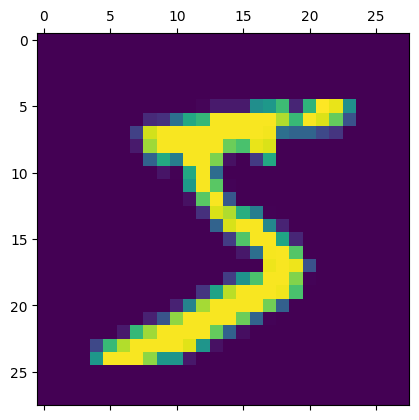

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2736 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1204 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0819 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0629 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9848


In [12]:
%load_ext tensorboard
%tensorboard --logdir logs/

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 37976.

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.02867139,  0.01275916, -0.05777654, ...,  0.05400376,
          0.01279462, -0.07745928],
        [-0.06635856,  0.01041481, -0.06362462, ..., -0.03719248,
          0.00623015, -0.04571644],
        [-0.00390062,  0.00016941,  0.03427304, ...,  0.03079339,
         -0.07243981,  0.01609492],
        ...,
        [-0.05699209,  0.00980535,  0.03068579, ...,  0.03886016,
          0.0597762 , -0.01052494],
        [-0.04112048,  0.07615839,  0.04792522, ...,  0.03272583,
          0.02819911, -0.02113349],
        [ 0.07389173, -0.05711065, -0.05071494, ..., -0.03499656,
         -0.0702989 ,  0.00646182]], dtype=float32),
 array([-0.07489207,  0.00173912, -0.13790834, -0.06641458,  0.02988369,
         0.09773943,  0.13923536,  0.0651691 ,  0.01034174,  0.03869791,
        -0.04871295,  0.1696655 ,  0.13915005, -0.07924182, -0.04985299,
        -0.07962275, -0.05170868, -0.05671517,  0.02099523,  0.03976074,
        -0.0609066 ,  0.08487385, -0.073227  ,  0.09116964, -0.076